In [1]:
! pip install geoplot
! pip install geopandas

! pip install pycountry
! pip install shapely==1.8.5 --no-binary shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 74.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681831 sha256=d7e077b80123e066c1e27520026f2bf1538c6b38049ef5325fb25ad8daf63269
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for shapely: filename=Shapely-1.8.5-cp310-cp310-linux_x86_64.whl size=345656 sha256=2c839069c8f2fe41aae099ee84c7a54664657b8a0e8e2074fb153fa1e

In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import pycountry
import plotly.express as px
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
usa = gpd.read_file('/kaggle/input/us-state-shapefiles/us_state.shp')
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [4]:
state_pop = pd.read_csv('../input/us-population-statistics-2018/nst-est2018-alldata.csv')
print(state_pop.head())

   SUMLEV REGION DIVISION  STATE              NAME  CENSUS2010POP  \
0      10      0        0      0     United States      308745538   
1      20      1        0      0  Northeast Region       55317240   
2      20      2        0      0    Midwest Region       66927001   
3      20      3        0      0      South Region      114555744   
4      20      4        0      0       West Region       71945553   

   ESTIMATESBASE2010  POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  ...  \
0          308758105        309326085        311580009        313874218  ...   
1           55318430         55380645         55600532         55776729  ...   
2           66929743         66974749         67152631         67336937  ...   
3          114563045        114867066        116039399        117271075  ...   
4           71946887         72103625         72787447         73489477  ...   

   RDOMESTICMIG2017  RDOMESTICMIG2018  RNETMIG2011  RNETMIG2012  RNETMIG2013  \
0          0.000000     

In [5]:
pop_states = usa.merge(state_pop, left_on='NAME', right_on='NAME')
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",...,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",...,-1.278002,-0.916222,1.843768,-0.120479,2.359797,1.925327,0.702299,0.036461,0.573348,0.934001
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",...,4.689728,7.127976,4.801565,4.910826,6.209397,6.493793,6.755571,5.516683,6.460703,9.019623
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",...,-0.698138,-1.040184,-1.999325,-1.820990,0.365060,-0.030544,-0.494039,-0.313424,0.968963,0.716636
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",...,-2.144836,-1.598828,1.516750,0.547598,-0.023724,-0.133225,-0.921843,-0.952470,0.302260,1.165270


<Axes: >

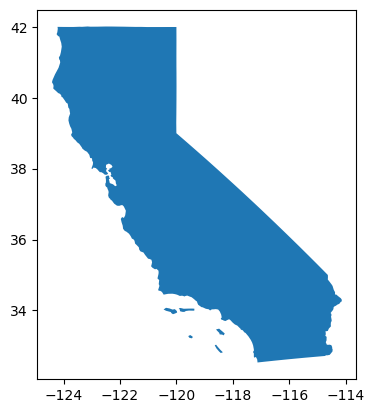

In [6]:
pop_states[pop_states.NAME=='California'].plot()

In [7]:
path = gplt.datasets.get_path('contiguous_usa')
contiguous_usa = gpd.read_file(path)
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


<Axes: >

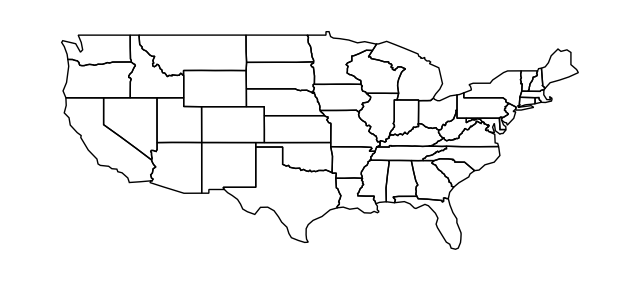

In [8]:
gplt.polyplot(contiguous_usa)

In [9]:
path = gplt.datasets.get_path('usa_cities')
usa_cities = gpd.read_file(path)
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


<Axes: >

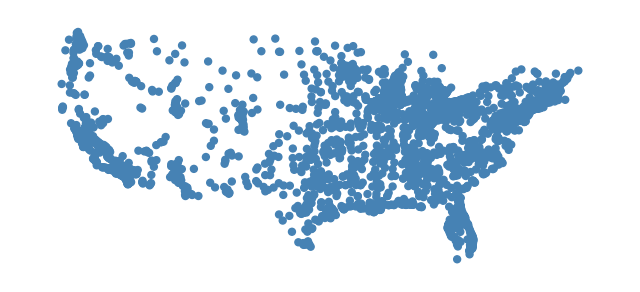

In [10]:
continental_usa_cities = usa_cities.query('STATE not in ["HI","AK", "PR"]')
gplt.pointplot(continental_usa_cities)

<Axes: >

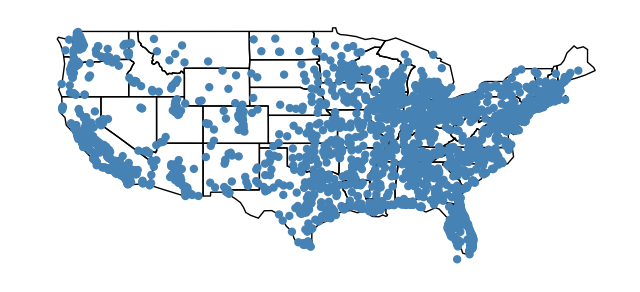

In [11]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

TypeError: unsupported operand type(s) for -: 'Axes' and 'GeoAxes'

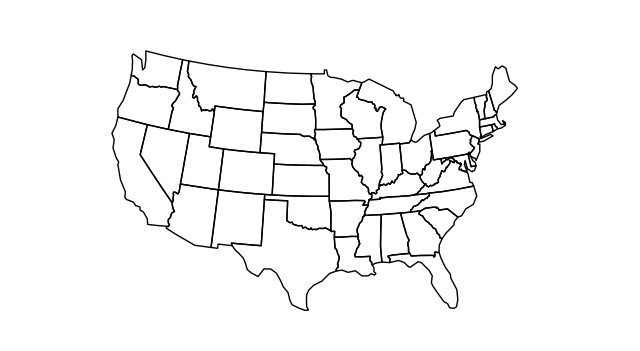

In [12]:
ax - gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
    continental_usa_cities,
    ax=ax,
    hue='ELEV_IN_FT',
    legend=True
)

In [ ]:
ax = gplt.polyplot(
    contiguous_usa, 
    edgecolor = "white",
    facecolor = "lightgray",
    figsize = (12,8), 
    projection = gcrs.AlbersEqualArea()
)

gplt.pointplot(
    continental_usa_cities, 
    ax=ax,
    hue="ELEV_IN_FT", 
    cmap = "Blues", 
    scheme = "quantiles", 
    scale = "ELEV_IN_FT", 
    limits = (1, 10), 
    legend = True,
    legend_var = "scale", 
    legend_kwargs = {"frameon": False}, 
    legend_values = [-110, 1750, 3600, 5500, 7400],
    legend_labels = ["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Citites in the continental US, by elevation", fontsize=16)

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    contiguous_usa,
    hue="population",
    edgecolor="white",
    linewidth=1,
    cmap="Greens",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "<3 million", "3-6.7 million", "6.7-12.8 million", "12.8-25 million", "25-37 million"
    ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

In [ ]:
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep="\t")
obesity.head()

In [ ]:
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

In [ ]:
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

In [ ]:
melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))
df = gpd.read_file(gplt.datasets.get_path("melbourne_schools"))
melbourne_primary_schools = df.query('School_Type == "Primary"')

ax = gplt.voronoi(
    melbourne_primary_schools,
    clip=melbourne,
    linewidth=0.5,
    edgecolor="white",
    projection=gcrs.Mercator()
)
gplt.polyplot(
    melbourne, 
    edgecolor="None", 
    facecolor="lightgray",
    ax=ax
)
gplt.pointplot(
    melbourne_primary_schools,
    color="black",
    ax=ax,
    s=1,
    extent=melbourne.total_bounds
)
plt.title("Primary Schools in Greater Melbourne, 2018")

In [ ]:
path = gplt.datasets.get_path('usa_cities')
usa_cities = gpd.read_file(path)

quantiles = mc.Quantiles(usa_cities['ELEV_IN_FT'], k=10)
ax = gplt.polyplot(contiguous_usa)

gplt.pointplot(
  usa_cities,
  hue="ELEV_IN_FT",
  scheme=quantiles,
  ax=ax,
  legend=True
)

In [ ]:
ax = gplt.voronoi(
    continental_usa_cities,
    hue="ELEV_IN_FT",
    clip=contiguous_usa,
    projection=gplt.crs.AlbersEqualArea(),
    cmap="Pastel1",
    legend=True,
    edgecolor="white",
    linewidth=0.5
)
gplt.polyplot(
    contiguous_usa,
    ax=ax,
    extent=contiguous_usa.total_bounds,
    edgecolor="black",
    linewidth=1,
)